# What are the distribution of points for each position in FPL?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data_path = '../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_path, low_memory = False)
seasons_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38


## Process data:

Consider only 2018/19 - 2022/23 seasons:

In [3]:
seasons = ['2020-21', '2021-22', '2022-23']
data_df = seasons_df.loc[seasons_df.season_x.isin(seasons),:]
data_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,1.0,32.0,1,0,0,0,55,True,0,1
19853,2020-21,Aaron Cresswell,DEF,West Ham,0,0,11,0,11.2,435,...,0.0,0.0,1,0,0,0,50,True,0,1
19854,2020-21,Aaron Mooy,MID,Brighton,0,0,0,0,0.0,60,...,1.0,0.0,0,0,0,0,50,True,0,1
19855,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,0,12,0,0.0,483,...,0.0,0.0,1,0,0,0,50,True,0,1
19856,2020-21,Abdoulaye Doucouré,MID,Everton,0,0,20,1,44.6,512,...,0.0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38


## Which positions earn the most points over the last 3 seasons?

In [4]:
data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})

C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\2304734420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})


In [5]:
position_pts = data_df.loc[:,['position','total_points','bonus','bps']].groupby(['position']).sum()
position_pts

,total_points,bonus,bps
position,,,
DEF,30972,2345,162981
FWD,13237,1496,42516
GK,8376,719,42206
MID,42001,2774,163477


C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\1502608944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\1502608944.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\1502608944.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize = axis_tick_font)


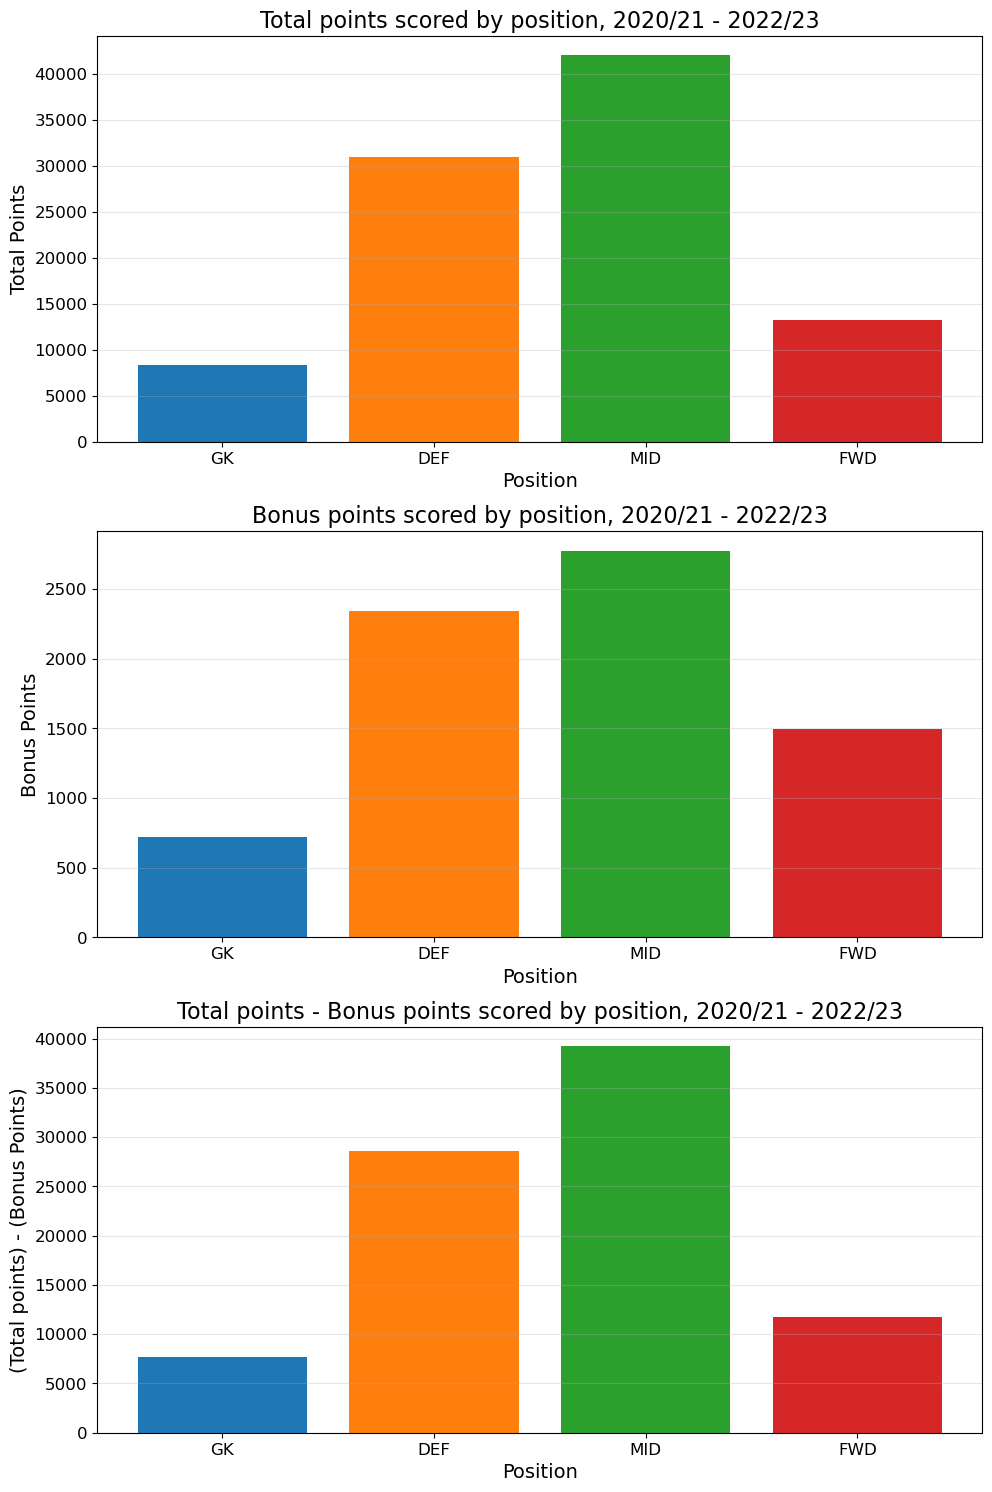

In [32]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows=3,ncols=1,figsize = (10,15))

ax[0].bar(0, position_pts.loc['GK','total_points'])
ax[0].bar(1, position_pts.loc['DEF','total_points'])
ax[0].bar(2, position_pts.loc['MID','total_points'])
ax[0].bar(3, position_pts.loc['FWD','total_points'])
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[0].set_xlabel('Position',fontsize = axis_label_font)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Total Points',fontsize = axis_label_font)
ax[0].grid(axis='y',alpha=0.3)
ax[0].set_title('Total points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

ax[1].bar(0, position_pts.loc['GK','bonus'])
ax[1].bar(1, position_pts.loc['DEF','bonus'])
ax[1].bar(2, position_pts.loc['MID','bonus'])
ax[1].bar(3, position_pts.loc['FWD','bonus'])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[1].set_xlabel('Position',fontsize = axis_label_font)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Bonus Points',fontsize = axis_label_font)
ax[1].grid(axis='y',alpha=0.3)
ax[1].set_title('Bonus points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

ax[2].bar(0, position_pts.loc['GK','total_points'] - position_pts.loc['GK','bonus'])
ax[2].bar(1, position_pts.loc['DEF','total_points'] - position_pts.loc['DEF','bonus'])
ax[2].bar(2, position_pts.loc['MID','total_points'] - position_pts.loc['MID','bonus'])
ax[2].bar(3, position_pts.loc['FWD','total_points'] - position_pts.loc['FWD','bonus'])
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[2].set_xlabel('Position',fontsize = axis_label_font)
ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize = axis_tick_font)
ax[2].set_ylabel('(Total points) - (Bonus Points)',fontsize = axis_label_font)
ax[2].grid(axis='y',alpha=0.3)
ax[2].set_title('Total points - Bonus points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

fig.tight_layout(pad = 1.0)
plt.savefig('Points_breakdown_per_position.png')

C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\2099813190.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_908\2099813190.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)


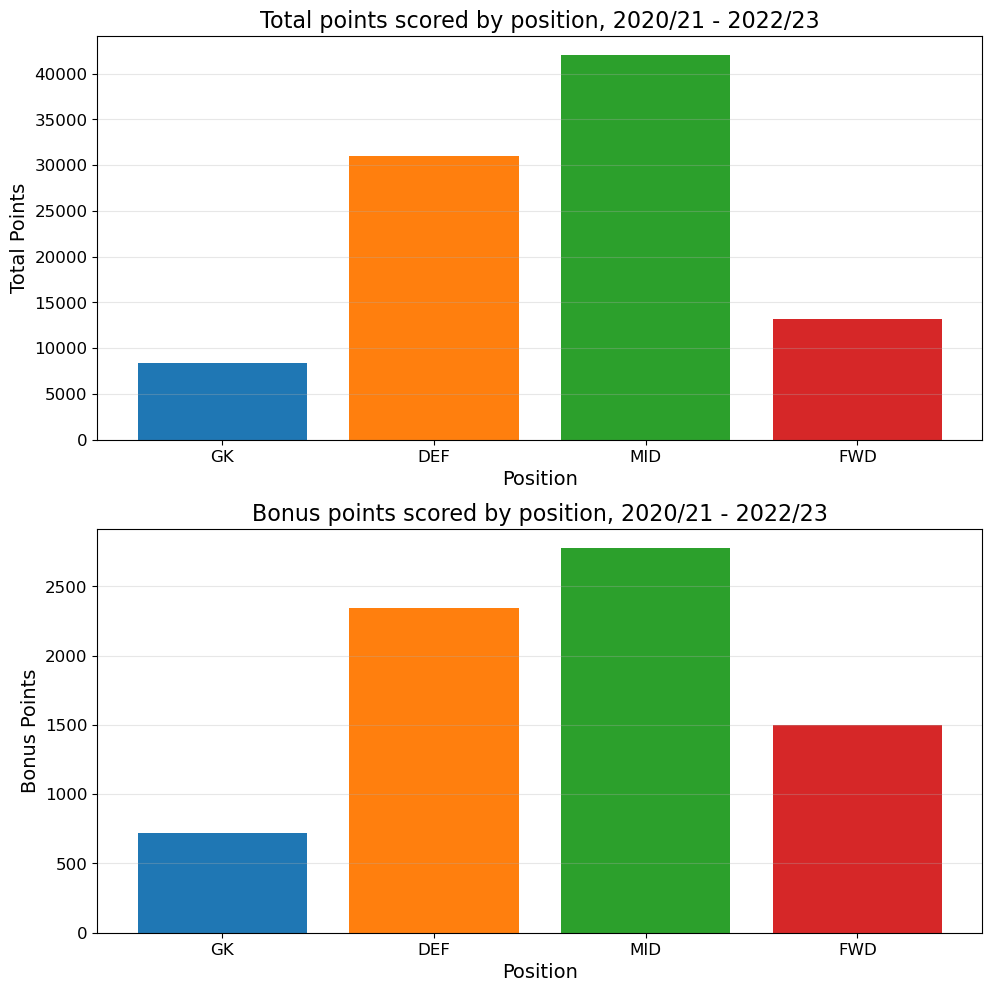

In [33]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (10,10))

ax[0].bar(0, position_pts.loc['GK','total_points'])
ax[0].bar(1, position_pts.loc['DEF','total_points'])
ax[0].bar(2, position_pts.loc['MID','total_points'])
ax[0].bar(3, position_pts.loc['FWD','total_points'])
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[0].set_xlabel('Position',fontsize = axis_label_font)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Total Points',fontsize = axis_label_font)
ax[0].grid(axis='y',alpha=0.3)
ax[0].set_title('Total points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

ax[1].bar(0, position_pts.loc['GK','bonus'])
ax[1].bar(1, position_pts.loc['DEF','bonus'])
ax[1].bar(2, position_pts.loc['MID','bonus'])
ax[1].bar(3, position_pts.loc['FWD','bonus'])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[1].set_xlabel('Position',fontsize = axis_label_font)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Bonus Points',fontsize = axis_label_font)
ax[1].grid(axis='y',alpha=0.3)
ax[1].set_title('Bonus points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

fig.tight_layout(pad = 1.0)
plt.savefig('total_and_bonus_pts_breakdown_per_position.png')